## import dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## load data

In [2]:
df = pd.read_csv('../data/raw.csv')
df.head()

,ID_Pengiriman,Tanggal,Waktu_Keberangkatan,Waktu_Kedatangan,Lat_Jemput,Lon_Jemput,Lat_Tujuan,Lon_Tujuan,Jarak_KM_Terukur,ID_Kurir,Tipe_Kendaraan,Pengalaman_Kurir,Jumlah_Paket,Kondisi_Cuaca,Kondisi_Lalu_Lintas,Tipe_Area_Tujuan,Durasi_Pengiriman_Menit,ETA_Awal_Menit,Status_Keterlambatan
0,DEL-00001,2023-10-09 10:28:00,2023-10-09 10:28:00,2023-10-09 12:09:35.444386,-6.187770,106.884394,-6.324869,106.783430,39.44772552617686,21,Motor,Menengah,37,Badai,Sedang,Perumahan,101.590740,63.494212,1
1,DEL-00002,2023-09-15 17:07:00,2023-09-15 17:07:00,2023-09-15 17:53:45.354053,-6.140012,106.898952,-6.140302,106.711119,19.092557707822586,7,Motor,Menengah,5,Hujan_Ringan,Ringan,Perumahan,46.755901,42.690170,0
2,DEL-00003,2023-09-21 13:57:00,2023-09-21 13:57:00,2023-09-21 14:05:42.112794,-6.101567,106.948339,-6.204143,106.927419,1.0,1,Motor,Menengah,5,Cerah,Sedang,Perumahan,8.701880,7.614145,0
3,DEL-00004,2023-09-19 13:10:00,2023-09-19 13:10:00,2023-09-19 13:53:23.355129,-6.112538,106.778596,-6.292112,106.655991,23.393817976950878,1,MTR,Rendah,11,Cerah,Sedang,Perumahan,43.389252,37.965596,0
4,DEL-00005,2023-09-11 14:52:00,2023-09-11 14:52:00,2023-09-11 15:15:47.785700,-6.085218,106.912228,-6.172220,106.816521,17.144595029161525,18,Mobil_Van,Rendah,16,Cerah,Ringan,Perumahan,23.796428,24.986250,0


## Cleaning Data

In [7]:
# Cek struktur dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Pengiriman            10000 non-null  object 
 1   Tanggal                  10000 non-null  object 
 2   Waktu_Keberangkatan      10000 non-null  object 
 3   Waktu_Kedatangan         10000 non-null  object 
 4   Lat_Jemput               10000 non-null  float64
 5   Lon_Jemput               10000 non-null  float64
 6   Lat_Tujuan               9800 non-null   float64
 7   Lon_Tujuan               10000 non-null  float64
 8   Jarak_KM_Terukur         10000 non-null  object 
 9   ID_Kurir                 10000 non-null  int64  
 10  Tipe_Kendaraan           10000 non-null  object 
 11  Pengalaman_Kurir         10000 non-null  object 
 12  Jumlah_Paket             10000 non-null  int64  
 13  Kondisi_Cuaca            10000 non-null  object 
 14  Kondisi_Lalu_Lintas    

1. tipe data yang salah
    - tanggal
    - waktu keberangkatan
    - waktu kedatangan
    - jarak km terukur
2. nilai kosong
    - lan tujuan
    - durasi pengiriman menit

In [4]:
# cek statistik deskriptif
df.describe()

,Lat_Jemput,Lon_Jemput,Lat_Tujuan,Lon_Tujuan,ID_Kurir,Jumlah_Paket,Durasi_Pengiriman_Menit,ETA_Awal_Menit,Status_Keterlambatan
count,10000.000000,10000.000000,9800.000000,10000.000000,10000.000000,10000.000000,9900.000000,10000.000000,10000.000000
mean,-6.197676,106.798379,-6.200301,106.800355,24.933600,21.858200,47.440540,40.337984,0.046500
std,0.086216,0.086299,0.086885,0.086432,14.105293,10.057107,62.566147,24.940046,0.210576
min,-6.349986,106.650002,-6.349995,106.650003,1.000000,5.000000,5.000000,-21.089756,0.000000
25%,-6.271467,106.722851,-6.275431,106.725907,13.000000,13.000000,22.292487,20.602444,0.000000
50%,-6.196705,106.798648,-6.200916,106.801431,25.000000,22.000000,43.100462,40.027153,0.000000
75%,-6.124507,106.872333,-6.124130,106.874930,37.000000,31.000000,64.924636,59.093225,0.000000
max,-6.050030,106.949937,-6.050008,106.949987,49.000000,39.000000,1967.535417,119.756683,1.000000


1 hari ada 1440 menit, tapi nilai maksimal durasi pengiriman menit itu 1967.5 berarti waktu pengiriman itu lebih dari 1 hari. terdapat potensi outlier di kolom durasi_pegiriman_menit, dilihat dari nilai Q3 dan max yang memilki perbedaan yang jauh

In [9]:
# cek nilai null
(df.isnull().sum()/len(df))*100

ID_Pengiriman              0.0
Tanggal                    0.0
Waktu_Keberangkatan        0.0
Waktu_Kedatangan           0.0
Lat_Jemput                 0.0
Lon_Jemput                 0.0
Lat_Tujuan                 2.0
Lon_Tujuan                 0.0
Jarak_KM_Terukur           0.0
ID_Kurir                   0.0
Tipe_Kendaraan             0.0
Pengalaman_Kurir           0.0
Jumlah_Paket               0.0
Kondisi_Cuaca              0.0
Kondisi_Lalu_Lintas        0.0
Tipe_Area_Tujuan           0.0
Durasi_Pengiriman_Menit    1.0
ETA_Awal_Menit             0.0
Status_Keterlambatan       0.0
dtype: float64

- null value pada kolom lat_tujuan sebanyak 2% dari seluruh data
- null value pada kolom durasi_pengiriman_menit sebanyak 1% dari seluruh data

In [10]:
# cek nilai duplikat
df.duplicated().sum()

np.int64(0)

tidak terdapat nilai duplikat

### Masalah pada data
1. tipe data tidak sesui : Tanggal, Waktu_Keberangkatan, Waktu_Kedatangan, Jarak_KM_Terukur
2. Nilai null : Lon_Tujuan (2% data), Durasi_Pengiriman_Menit(1% data)
3. Potensi nilai outlier : Durasi_Pengiriman_Menit

### Mengubah tipe data

In [11]:
# object ke datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df['Waktu_Keberangkatan'] = pd.to_datetime(df['Waktu_Keberangkatan'])
df['Waktu_Kedatangan'] = pd.to_datetime(df['Waktu_Kedatangan'])


In [13]:
df['Jarak_KM_Terukur'] = df['Jarak_KM_Terukur'].astype(float)

ValueError: could not convert string to float: '5.85 KM'

terdapat data yang memiliki KM

In [14]:
df['Jarak_KM_Terukur'] = df['Jarak_KM_Terukur'].str.replace('KM', '', regex=False)

In [15]:
df['Jarak_KM_Terukur'] = df['Jarak_KM_Terukur'].str.strip() # menghapus spasi

In [16]:
df['Jarak_KM_Terukur'] = df['Jarak_KM_Terukur'].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID_Pengiriman            10000 non-null  object        
 1   Tanggal                  10000 non-null  datetime64[ns]
 2   Waktu_Keberangkatan      10000 non-null  datetime64[ns]
 3   Waktu_Kedatangan         10000 non-null  datetime64[ns]
 4   Lat_Jemput               10000 non-null  float64       
 5   Lon_Jemput               10000 non-null  float64       
 6   Lat_Tujuan               9800 non-null   float64       
 7   Lon_Tujuan               10000 non-null  float64       
 8   Jarak_KM_Terukur         10000 non-null  float64       
 9   ID_Kurir                 10000 non-null  int64         
 10  Tipe_Kendaraan           10000 non-null  object        
 11  Pengalaman_Kurir         10000 non-null  object        
 12  Jumlah_Paket             10000 no

### Mengatasi Nilai null
karena data yang kosong hanya 2% dan 1% maka data kosong tersebut akan di hapus.

In [18]:
df.dropna(inplace=True)

In [20]:
df.isnull().sum()

ID_Pengiriman              0
Tanggal                    0
Waktu_Keberangkatan        0
Waktu_Kedatangan           0
Lat_Jemput                 0
Lon_Jemput                 0
Lat_Tujuan                 0
Lon_Tujuan                 0
Jarak_KM_Terukur           0
ID_Kurir                   0
Tipe_Kendaraan             0
Pengalaman_Kurir           0
Jumlah_Paket               0
Kondisi_Cuaca              0
Kondisi_Lalu_Lintas        0
Tipe_Area_Tujuan           0
Durasi_Pengiriman_Menit    0
ETA_Awal_Menit             0
Status_Keterlambatan       0
dtype: int64

### Menangani potensi outlier

In [ ]:
# deteksi outlier dengan IQR
Q1 = df['Durasi_Pengiriman_Menit'].quantile(0.25)
Q3 = df['Durasi_Pengiriman_Menit'].quantile(0.75)
IQR = Q3-Q1

batas_bawah = Q1-1.5*IQR
batas_atas = Q3+1.5*IQR

outlier = df[(df['Durasi_Pengiriman_Menit'] < batas_bawah) | (df['Durasi_Pengiriman_Menit'] > batas_atas)]
outlier


,ID_Pengiriman,Tanggal,Waktu_Keberangkatan,Waktu_Kedatangan,Lat_Jemput,Lon_Jemput,Lat_Tujuan,Lon_Tujuan,Jarak_KM_Terukur,ID_Kurir,Tipe_Kendaraan,Pengalaman_Kurir,Jumlah_Paket,Kondisi_Cuaca,Kondisi_Lalu_Lintas,Tipe_Area_Tujuan,Durasi_Pengiriman_Menit,ETA_Awal_Menit,Status_Keterlambatan
27,DEL-00028,2023-09-06 12:41:00,2023-09-06 12:41:00,2023-09-06 15:06:54.836308,-6.340599,106.685796,-6.327649,106.917911,46.978585,20,Motor,Menengah,11,Cerah,Padat,Perumahan,145.913938,95.756022,1
65,DEL-00066,2023-09-02 16:44:00,2023-09-02 16:44:00,2023-09-02 19:20:05.432852,-6.159998,106.896790,-6.319959,106.693164,51.568471,1,Mobil_Van,Rendah,20,Cerah,Padat,Bisnis,156.090548,102.434422,1
716,DEL-00717,2023-09-15 09:10:00,2023-09-15 09:10:00,2023-09-15 11:49:53.512158,-6.128199,106.729380,-6.311111,106.925318,47.335373,1,Motor,Menengah,24,Cerah,Padat,Perumahan,159.891869,104.929039,1
851,DEL-00852,2023-09-29 15:38:00,2023-09-29 15:38:00,2023-09-29 18:16:37.114305,-6.278378,106.671569,-6.325129,106.911746,41.397017,48,Motor,Menengah,10,Hujan_Ringan,Padat,Perumahan,158.618572,90.516033,1
889,DEL-00890,2023-10-14 12:25:00,2023-10-14 12:25:00,2023-10-14 14:36:49.219776,-6.117799,106.747277,-6.286937,106.745302,40.426481,18,Van,Menengah,17,Cerah,Padat,Perumahan,131.820330,86.507091,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266,DEL-09267,2023-09-08 09:08:00,2023-09-08 09:08:00,2023-09-08 11:51:31.769260,-6.064512,106.758498,-6.272039,106.722392,50.245271,27,Mobil_Van,Menengah,15,Badai,Sedang,Industri,163.529488,102.205930,1
9394,DEL-09395,2023-09-16 16:34:00,2023-09-16 16:34:00,2023-09-16 16:40:36.441577,-6.305369,106.904237,-6.341463,106.701916,4.205039,19,Mobil_Van,Tinggi,16,Badai,Ringan,Perumahan,1935.105107,5.506133,0
9450,DEL-09451,2023-10-22 19:13:00,2023-10-22 19:13:00,2023-10-22 21:24:37.684330,-6.337422,106.925249,-6.266557,106.719594,43.045496,22,Motor,Menengah,36,Badai,Ringan,Perumahan,131.628072,98.721054,1
9699,DEL-09700,2023-10-12 07:42:00,2023-10-12 07:42:00,2023-10-12 09:55:18.684312,-6.067475,106.945410,-6.112399,106.746914,45.036907,31,Motor,Menengah,11,Hujan_Ringan,Padat,Industri,133.311405,76.074443,1


In [27]:
len(outlier)/len(df)*100

0.9380476239562933

In [28]:
outlier['Durasi_Pengiriman_Menit'].min()

np.float64(128.9046819476653)

In [29]:
outlier['Durasi_Pengiriman_Menit'].max()

np.float64(1967.53541665578)

terdapat 0.93% data yang terindikasi outlier. tetapi jika dianalisis lebih lanjut, angka ini tergolong normal, karena kondisi lalu lintas yang tergolong padat atau kondisi cuaca yang badai. tetapi ada nilai 1935.105107 menit dengan kondisi lalu lintas yang ringan dan kondisi cuaca badai. Nilai tersebut dibandingan dengan baris yang lain dengan kondisi lalu lintas yang ringan dan cuaca yang padat tidak memiliki data Durasi_Pengiriman_Menit setinggi itu.

In [31]:
outlier.groupby('Kondisi_Lalu_Lintas')['Durasi_Pengiriman_Menit'].agg(['min', 'max', 'mean'])

,min,max,mean
Kondisi_Lalu_Lintas,,,
Padat,128.904682,189.809055,144.583862
Ringan,131.628072,1944.945323,1552.110523
Sedang,129.002018,1967.535417,651.703492


In [33]:
outlier.groupby('Kondisi_Cuaca')['Durasi_Pengiriman_Menit'].agg(['min', 'max', 'mean'])

,min,max,mean
Kondisi_Cuaca,,,
Badai,131.628072,1935.105107,359.897312
Cerah,129.457498,1967.535417,410.048440
Hujan_Ringan,128.904682,1944.945323,228.674079


terdapat pengiriman waktu yang lebih dari 1 hari atau 1440 menit

In [35]:
# melihat data yang lebih dari 1 hari
outlier[outlier['Durasi_Pengiriman_Menit']>1440]

,ID_Pengiriman,Tanggal,Waktu_Keberangkatan,Waktu_Kedatangan,Lat_Jemput,Lon_Jemput,Lat_Tujuan,Lon_Tujuan,Jarak_KM_Terukur,ID_Kurir,Tipe_Kendaraan,Pengalaman_Kurir,Jumlah_Paket,Kondisi_Cuaca,Kondisi_Lalu_Lintas,Tipe_Area_Tujuan,Durasi_Pengiriman_Menit,ETA_Awal_Menit,Status_Keterlambatan
1371,DEL-01372,2023-10-03 16:38:00,2023-10-03 16:38:00,2023-10-03 17:21:00.444606,-6.072578,106.692712,-6.309059,106.681416,15.075906,13,Motor,Menengah,20,Cerah,Sedang,Bisnis,1967.535417,37.631484,0
1670,DEL-01671,2023-10-25 12:53:00,2023-10-25 12:53:00,2023-10-25 12:58:00.000000,-6.194760,106.802556,-6.100845,106.942769,1.000000,1,Mobil_Van,Tinggi,27,Hujan_Ringan,Ringan,Perumahan,1671.503314,2.520306,0
2794,DEL-02795,2023-10-02 19:31:00,2023-10-02 19:31:00,2023-10-02 20:35:30.447536,-6.254026,106.947527,-6.056468,106.743568,38.577619,42,Mobil_Van,Menengah,21,Cerah,Ringan,Bisnis,1699.568851,67.732832,0
4148,DEL-04149,2023-10-18 10:14:00,2023-10-18 10:14:00,2023-10-18 12:02:27.224239,-6.285652,106.742031,-6.216228,106.689318,45.776071,9,Motor,Rendah,36,Badai,Ringan,Bisnis,1512.566637,81.340303,0
4188,DEL-04189,2023-10-29 11:15:00,2023-10-29 11:15:00,2023-10-29 12:05:24.814613,-6.149241,106.774197,-6.270612,106.915840,28.345649,26,Mobil_Van,Tinggi,10,Cerah,Ringan,Perumahan,1709.857400,58.815840,0
4764,DEL-04765,2023-09-13 12:04:00,2023-09-13 12:04:00,2023-09-13 12:24:57.380967,-6.308414,106.923416,-6.075185,106.739116,9.638730,36,Motor,Menengah,17,Cerah,Sedang,Perumahan,1902.744447,18.336806,0
4980,DEL-04981,2023-09-16 17:51:00,2023-09-16 17:51:00,2023-09-16 19:12:31.631858,-6.243589,106.870889,-6.325917,106.921035,39.195793,45,Motor,Menengah,35,Hujan_Ringan,Ringan,Bisnis,1944.945323,74.437876,0
6364,DEL-06365,2023-09-29 07:19:00,2023-09-29 07:19:00,2023-09-29 07:42:51.667001,-6.112725,106.819172,-6.135980,106.800921,17.231370,13,Motor,Menengah,9,Cerah,Ringan,Industri,1811.709478,25.054173,0
6661,DEL-06662,2023-09-09 10:52:00,2023-09-09 10:52:00,2023-09-09 12:17:58.970366,-6.275194,106.821799,-6.204382,106.778156,41.396154,13,Motor,Tinggi,36,Cerah,Sedang,Bisnis,1668.211491,83.594427,0
9394,DEL-09395,2023-09-16 16:34:00,2023-09-16 16:34:00,2023-09-16 16:40:36.441577,-6.305369,106.904237,-6.341463,106.701916,4.205039,19,Mobil_Van,Tinggi,16,Badai,Ringan,Perumahan,1935.105107,5.506133,0


dari data diatas, kondisi cuaca tidak buruk atau ada 1 data yang buruk yaitu badan dan kurir mengguanakan mobil memiliki waktu pengiriman lebih dari 1 hari. data yang memiliki nilai lebih dari 1 hari akan dihapus

In [37]:
df = df[df['Durasi_Pengiriman_Menit']<1440]

In [40]:
df['Durasi_Pengiriman_Menit'].max()

np.float64(189.80905474976456)

In [44]:
df.select_dtypes(include='number').describe()

,Lat_Jemput,Lon_Jemput,Lat_Tujuan,Lon_Tujuan,Jarak_KM_Terukur,ID_Kurir,Jumlah_Paket,Durasi_Pengiriman_Menit,ETA_Awal_Menit,Status_Keterlambatan
count,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000
mean,-6.197638,106.798249,-6.200412,106.800504,21.289130,24.965432,21.827262,45.698012,40.334227,0.046538
std,0.086212,0.086386,0.086903,0.086352,12.615379,14.114640,10.048227,29.175116,24.953385,0.210658
min,-6.349986,106.650002,-6.349995,106.650003,1.000000,1.000000,5.000000,5.000000,-21.089756,0.000000
25%,-6.271613,106.722333,-6.275658,106.726160,11.004318,13.000000,13.000000,22.264043,20.594671,0.000000
50%,-6.196669,106.798409,-6.201043,106.801456,21.132235,25.000000,22.000000,43.032301,39.956525,0.000000
75%,-6.124559,106.872642,-6.124198,106.874909,31.142623,37.000000,30.000000,64.850414,59.073355,0.000000
max,-6.050030,106.949937,-6.050008,106.949987,59.020737,49.000000,39.000000,189.809055,119.756683,1.000000


In [46]:
df.to_csv('../data/data_cleaned.csv', index=False)

## Exploratory Data Analysis (EDA)

In [47]:
df = pd.read_csv('../data/data_cleaned.csv')
df.head()

,ID_Pengiriman,Tanggal,Waktu_Keberangkatan,Waktu_Kedatangan,Lat_Jemput,Lon_Jemput,Lat_Tujuan,Lon_Tujuan,Jarak_KM_Terukur,ID_Kurir,Tipe_Kendaraan,Pengalaman_Kurir,Jumlah_Paket,Kondisi_Cuaca,Kondisi_Lalu_Lintas,Tipe_Area_Tujuan,Durasi_Pengiriman_Menit,ETA_Awal_Menit,Status_Keterlambatan
0,DEL-00001,2023-10-09 10:28:00,2023-10-09 10:28:00,2023-10-09 12:09:35.444386,-6.187770,106.884394,-6.324869,106.783430,39.447726,21,Motor,Menengah,37,Badai,Sedang,Perumahan,101.590740,63.494212,1
1,DEL-00002,2023-09-15 17:07:00,2023-09-15 17:07:00,2023-09-15 17:53:45.354053,-6.140012,106.898952,-6.140302,106.711119,19.092558,7,Motor,Menengah,5,Hujan_Ringan,Ringan,Perumahan,46.755901,42.690170,0
2,DEL-00003,2023-09-21 13:57:00,2023-09-21 13:57:00,2023-09-21 14:05:42.112794,-6.101567,106.948339,-6.204143,106.927419,1.000000,1,Motor,Menengah,5,Cerah,Sedang,Perumahan,8.701880,7.614145,0
3,DEL-00004,2023-09-19 13:10:00,2023-09-19 13:10:00,2023-09-19 13:53:23.355129,-6.112538,106.778596,-6.292112,106.655991,23.393818,1,MTR,Rendah,11,Cerah,Sedang,Perumahan,43.389252,37.965596,0
4,DEL-00005,2023-09-11 14:52:00,2023-09-11 14:52:00,2023-09-11 15:15:47.785700,-6.085218,106.912228,-6.172220,106.816521,17.144595,18,Mobil_Van,Rendah,16,Cerah,Ringan,Perumahan,23.796428,24.986250,0


### Bagaimana distribusi waktu pengiriman

<Axes: xlabel='Durasi_Pengiriman_Menit', ylabel='Count'>

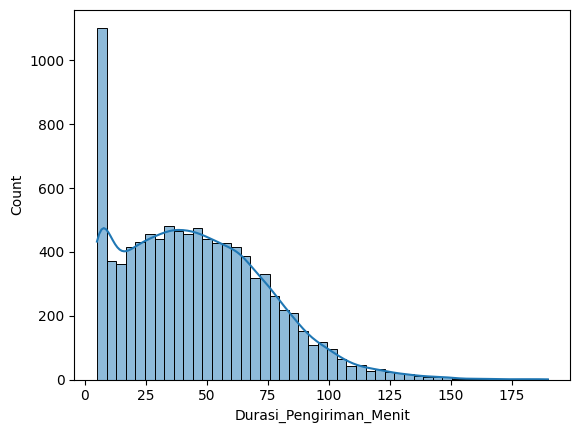

In [56]:
sns.histplot(df['Durasi_Pengiriman_Menit'], kde=True)

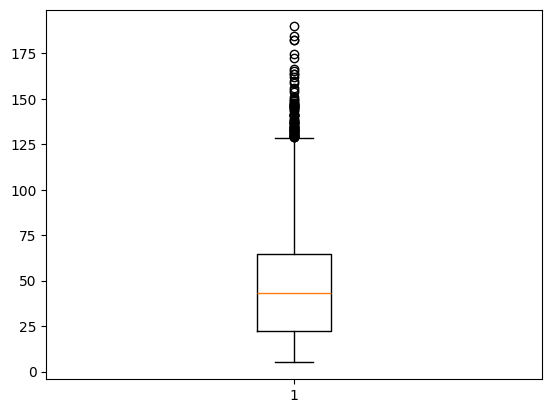

In [55]:
plt.boxplot(df['Durasi_Pengiriman_Menit'])
plt.show()

### bagaimana distibusi keterlambatan

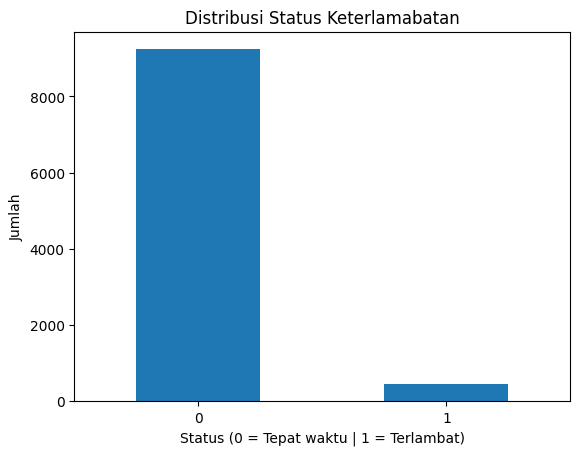

In [75]:
df['Status_Keterlambatan'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Distribusi Status Keterlamabatan')
plt.xlabel('Status (0 = Tepat waktu | 1 = Terlambat)')
plt.ylabel('Jumlah')
plt.show()

### Apakah ETA yang ada pada data sudah akurat dalam mempediksi durasi pengiriman?

In [80]:
df['selisih'] = df['Durasi_Pengiriman_Menit'] - df['ETA_Awal_Menit']
df['selisih'].describe()

count    9691.000000
mean        5.363785
std        11.378439
min       -15.968718
25%        -1.708002
50%         2.168161
75%         8.458359
max       100.836060
Name: selisih, dtype: float64

rata-rata keterlamabtan adalah 5 menit dan keterlambatan paling tinggi adalah 100 menit atau 1 jam 40 menit.

### Bagaimana hubungan antara jarak dengan durasi pengiriman?

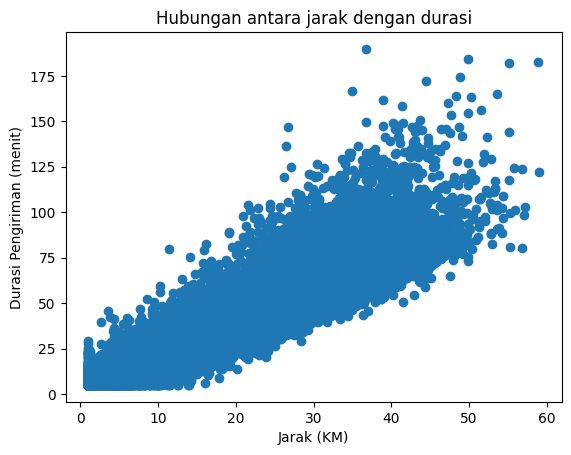

In [82]:
plt.scatter(df['Jarak_KM_Terukur'], df['Durasi_Pengiriman_Menit'])
plt.title('Hubungan antara jarak dengan durasi')
plt.xlabel('Jarak (KM)')
plt.ylabel('Durasi Pengiriman (menit)')
plt.show()

### Apa tipe kendaraan yang paling efisien dalam melakukan pengantaran?

In [83]:
df['Tipe_Kendaraan'].value_counts()

Tipe_Kendaraan
Motor         6804
Mobil_Van     1944
Truk_Kecil     382
motor          284
MTR            189
Van             88
Name: count, dtype: int64

tipe kendaraan masih belum seragam
- MTR, motor --> Motor
- van --> Mobil_Van

In [84]:
# menyelaraskan tipe kendaraar
tipe_kendaraan_dict = {
    'MTR' : 'Motor',
    'motor' : 'Motor',
    'Van' : 'Mobil_Van'
}

df['Tipe_Kendaraan'] = df['Tipe_Kendaraan'].replace(tipe_kendaraan_dict)

In [86]:
df['Tipe_Kendaraan'].value_counts()

Tipe_Kendaraan
Motor         7277
Mobil_Van     2032
Truk_Kecil     382
Name: count, dtype: int64

In [90]:
df.groupby('Tipe_Kendaraan')['Durasi_Pengiriman_Menit'].agg(['min', 'max', 'mean', 'count'])

,min,max,mean,count
Tipe_Kendaraan,,,,
Mobil_Van,5.0,184.510736,45.727569,2032
Motor,5.0,189.809055,45.762437,7277
Truk_Kecil,5.0,163.797557,44.313512,382


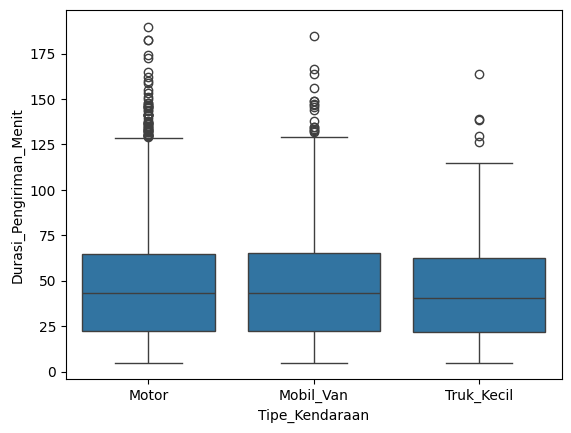

In [92]:
sns.boxplot(x='Tipe_Kendaraan', y='Durasi_Pengiriman_Menit', data=df)
plt.show()

dari data diatas, tidak ada tipe kendaraan yang terlihat paling efisien

### Apakah pengalaman kurir memiliki pengaruh pada kecepatan pengantaran?

In [93]:
df.groupby(['Pengalaman_Kurir', 'Status_Keterlambatan'])['Durasi_Pengiriman_Menit'].agg(['count', 'mean'])

count        mean
Pengalaman_Kurir Status_Keterlambatan                   
Menengah         0                      4629   43.218266
                 1                       283  110.228174
Rendah           0                      1837   43.878839
                 1                       103  106.989514
Tinggi           0                      2774   40.691987
                 1                        65  109.270685

In [122]:
# analisis berdasarkan rata-rata tempat waktu dan terlambat
durasi_pengalaman_kurir = df.groupby(['Pengalaman_Kurir', 'Status_Keterlambatan'])['Durasi_Pengiriman_Menit'].mean().unstack()
durasi_pengalaman_kurir

Status_Keterlambatan,0,1
Pengalaman_Kurir,,
Menengah,43.218266,110.228174
Rendah,43.878839,106.989514
Tinggi,40.691987,109.270685


- dari semua tingkat pengalaman, pengiriman saat telambat 2x lebih lama
- semakin tinggi tingkat pengalaman, semakin cepat dalam melakukan pengiriman, terutama saat tepat waktu

In [154]:
# pallete
palette= [
    '#FFB5E8',  # pink
    '#B28DFF',  # violet
    '#AFF8DB',  # mint
    '#85E3FF',  # sky
    '#FFABAB',  # salmon
    '#FDFD96',  # light yellow
    '#C4FAF8'   # turquoise
]

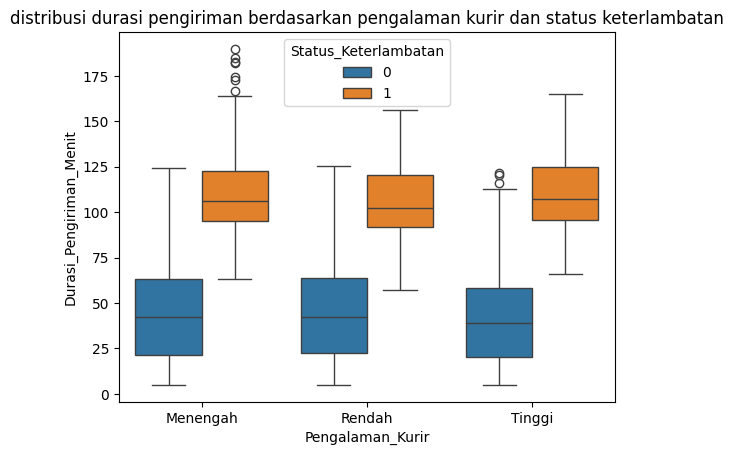

In [156]:
sns.boxplot(x='Pengalaman_Kurir', 
            y='Durasi_Pengiriman_Menit', 
            hue='Status_Keterlambatan', 
            data=df)
plt.title('distribusi durasi pengiriman berdasarkan pengalaman kurir dan status keterlambatan')
plt.show()

In [118]:
# analisis berdasarkan jumlah pengiriman
tingkat_penglaman_count = df.groupby(['Pengalaman_Kurir', 'Status_Keterlambatan'])['Durasi_Pengiriman_Menit'].count().unstack()
tingkat_penglaman_count['total'] = tingkat_penglaman_count[0] + tingkat_penglaman_count[1]
tingkat_penglaman_count['presentase keterlamabatan'] = ((tingkat_penglaman_count[1]/tingkat_penglaman_count['total'])* 100).round(2)
tingkat_penglaman_count


Status_Keterlambatan,0,1,total,presentase keterlamabatan
Pengalaman_Kurir,,,,
Menengah,4629,283,4912,5.76
Rendah,1837,103,1940,5.31
Tinggi,2774,65,2839,2.29


- kurir berpengalaman tinggi memiliki presentase keterlambatan terendah yaitu 2.29%
- kurir berpengalaman rendah dan menengah memiliki presentase keterlamabatan lebih tinggi yaitu 5.3% - 5.8%


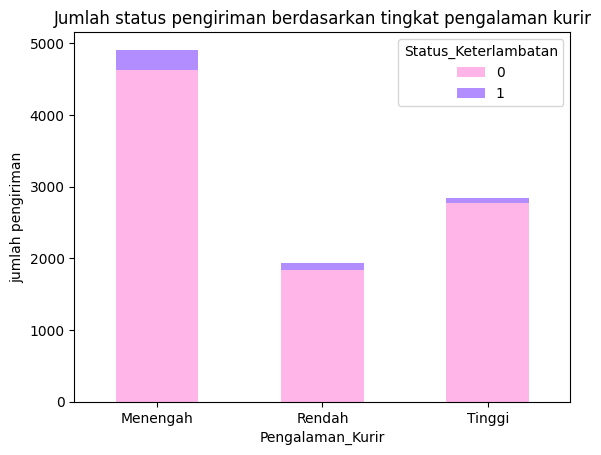

In [160]:
tingkat_penglaman_count[[0,1]].plot(kind='bar', stacked=True, color=palette)
plt.title('Jumlah status pengiriman berdasarkan tingkat pengalaman kurir')
plt.ylabel('jumlah pengiriman')
plt.xticks(rotation=0)
plt.show()

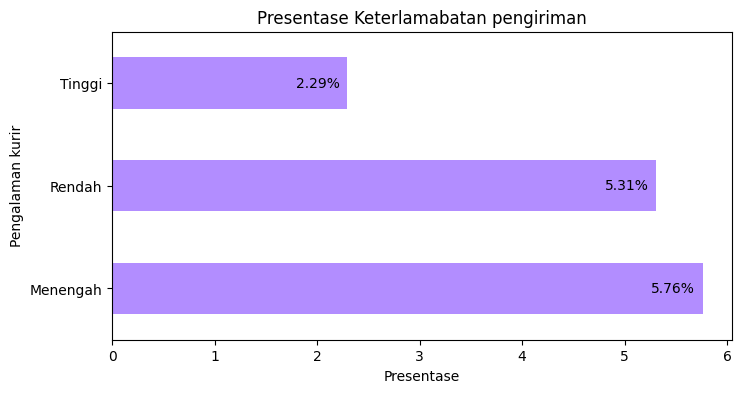

In [162]:
ax = tingkat_penglaman_count['presentase keterlamabatan'].plot(kind='barh', color='#B28DFF', figsize=(8,4))
for index, value in enumerate(tingkat_penglaman_count['presentase keterlamabatan']):
    plt.text(value - 0.5, index, f'{value:.2f}%', va='center')

plt.title('Presentase Keterlamabatan pengiriman')
plt.xlabel('Presentase')
plt.ylabel('Pengalaman kurir')
plt.show()

### Bagaimana kinerja kurir?

In [ ]:
# ubah tipe id_kurir dari int ke object
df['ID_Kurir']=df['ID_Kurir'].astype('object')

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9691 entries, 0 to 9690
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Pengiriman            9691 non-null   object 
 1   Tanggal                  9691 non-null   object 
 2   Waktu_Keberangkatan      9691 non-null   object 
 3   Waktu_Kedatangan         9691 non-null   object 
 4   Lat_Jemput               9691 non-null   float64
 5   Lon_Jemput               9691 non-null   float64
 6   Lat_Tujuan               9691 non-null   float64
 7   Lon_Tujuan               9691 non-null   float64
 8   Jarak_KM_Terukur         9691 non-null   float64
 9   ID_Kurir                 9691 non-null   object 
 10  Tipe_Kendaraan           9691 non-null   object 
 11  Pengalaman_Kurir         9691 non-null   object 
 12  Jumlah_Paket             9691 non-null   int64  
 13  Kondisi_Cuaca            9691 non-null   object 
 14  Kondisi_Lalu_Lintas     

In [216]:
# melihat top 5 kurir berdasarkan jumlah pengiriman yang dilakukan
top_5 = df.groupby('ID_Kurir')['Durasi_Pengiriman_Menit'].count().sort_values(ascending=False).head()
top_5

ID_Kurir
12    225
8     221
31    218
5     212
27    210
Name: Durasi_Pengiriman_Menit, dtype: int64

In [218]:
top_5_df.head()

,ID_Pengiriman,Tanggal,Waktu_Keberangkatan,Waktu_Kedatangan,Lat_Jemput,Lon_Jemput,Lat_Tujuan,Lon_Tujuan,Jarak_KM_Terukur,ID_Kurir,Tipe_Kendaraan,Pengalaman_Kurir,Jumlah_Paket,Kondisi_Cuaca,Kondisi_Lalu_Lintas,Tipe_Area_Tujuan,Durasi_Pengiriman_Menit,ETA_Awal_Menit,Status_Keterlambatan,selisih
6,DEL-00007,2023-09-03 12:52:00,2023-09-03 12:52:00,2023-09-03 13:43:30.758527,-6.218279,106.701868,-6.323360,106.788317,31.727707,31,Mobil_Van,Rendah,31,Cerah,Ringan,Bisnis,51.512642,54.088274,0,-2.575632
34,DEL-00035,2023-10-15 08:46:00,2023-10-15 08:46:00,2023-10-15 10:06:30.416064,-6.133305,106.883727,-6.063127,106.757048,35.957347,5,Truk_Kecil,Menengah,18,Cerah,Ringan,Industri,80.506934,84.532281,0,-4.025347
51,DEL-00053,2023-10-05 11:46:00,2023-10-05 11:46:00,2023-10-05 12:49:18.379157,-6.140354,106.775141,-6.232410,106.828720,20.510000,27,Mobil_Van,Rendah,39,Badai,Sedang,Perumahan,63.306319,39.566450,0,23.739870
61,DEL-00063,2023-10-13 19:35:00,2023-10-13 19:35:00,2023-10-13 20:38:18.323416,-6.269434,106.721849,-6.090486,106.949987,13.031423,12,Motor,Menengah,5,Badai,Padat,Bisnis,63.305390,29.674402,1,33.630989
67,DEL-00069,2023-10-14 10:29:00,2023-10-14 10:29:00,2023-10-14 10:34:00.000000,-6.285884,106.825567,-6.316068,106.695447,1.000000,12,Motor,Menengah,5,Cerah,Ringan,Bisnis,5.000000,-2.784757,0,7.784757


In [ ]:
# rata rata durasi pengiriman kurir top 5
top_5_df = df[df['ID_Kurir'].isin([12, 8, 31, 5, 27])]
top_5_df.groupby('ID_Kurir')['Durasi_Pengiriman_Menit'].agg(['mean'])

,mean
ID_Kurir,
5,45.073641
8,44.509745
12,46.598286
27,48.244945
31,47.569734


rata-rata durasi pengiriman adalah 44 menit - 48 menit

In [249]:
# tingkat keterlambatan top 5
top_5_presentase = top_5_df.groupby(['ID_Kurir','Status_Keterlambatan'])['Durasi_Pengiriman_Menit'].count().unstack()
top_5_presentase['Tingkat Keterlambatan'] = ((top_5_presentase[1]/(top_5_presentase[1]+top_5_presentase[0]))*100).round(2)

In [252]:
top_5_presentase.sort_values(by='Tingkat Keterlambatan', ascending=True)

Status_Keterlambatan,0,1,Tingkat Keterlambatan
ID_Kurir,,,
8,212,9,4.07
12,213,12,5.33
5,200,12,5.66
27,198,12,5.71
31,205,13,5.96


tingkat keterlambatan kurir top 5 adalah 4%-6%